# Calculate a Pareto optimal set

[Pareto optimality](https://en.wikipedia.org/wiki/Pareto_efficiency) (or multi-objective optimization) allows one to search for optimal solutions for an optimization problem with multiple objectives. The Pareto class in the Orthogonal Array package allows one to calculate the Pareto optimal elements (called the Pareto frontier).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import oapackage

First, define a dataset of 50 random vectors. The vectors have length 2, so there are 2 objectives to be optimized.

Text(0, 0.5, 'Objective 2')

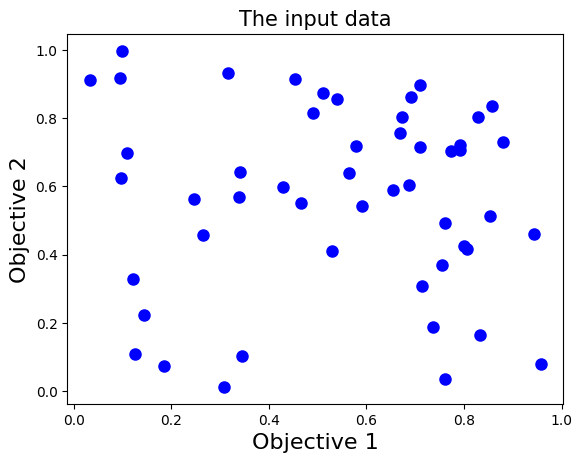

In [2]:
datapoints = np.random.rand(2, 50)

for ii in range(0, datapoints.shape[1]):
    w = datapoints[:, ii]
    fac = 0.6 + 0.4 * np.linalg.norm(w)
    datapoints[:, ii] = (1 / fac) * w

h = plt.plot(datapoints[0, :], datapoints[1, :], ".b", markersize=16, label="Non Pareto-optimal")
_ = plt.title("The input data", fontsize=15)
plt.xlabel("Objective 1", fontsize=16)
plt.ylabel("Objective 2", fontsize=16)

Create a structure (`ParetoDoubleLong`) to keep track of the data.

In [3]:
pareto = oapackage.ParetoDoubleLong()

for ii in range(0, datapoints.shape[1]):
    w = oapackage.doubleVector((datapoints[0, ii], datapoints[1, ii]))
    pareto.addvalue(w, ii)

pareto.show(verbose=1)

Pareto: 8 optimal values, 8 objects


Plot the results.

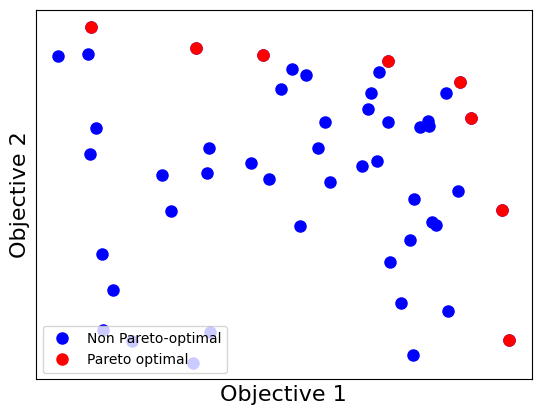

In [4]:
lst = pareto.allindices()  # the indices of the Pareto optimal designs

optimal_datapoints = datapoints[:, lst]

h = plt.plot(datapoints[0, :], datapoints[1, :], ".b", markersize=16, label="Non Pareto-optimal")
hp = plt.plot(optimal_datapoints[0, :], optimal_datapoints[1, :], ".r", markersize=16, label="Pareto optimal")
plt.xlabel("Objective 1", fontsize=16)
plt.ylabel("Objective 2", fontsize=16)
plt.xticks([])
plt.yticks([])
_ = plt.legend(loc=3, numpoints=1)